In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [2]:
by_boro = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/group-data-by-boro.csv")

In [3]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,230303.0,31711.0,8542.0,8996.55,1238.76,333.68,150422.0,22828.0,...,8536.0,10124.15,1424.45,378.73,62060.0,5875.0,1606.0,13033.90,1233.87,337.29
1,Age,0-4,5945.0,257.0,NaN,3249.95,140.49,NaN,3615.0,179.0,...,NaN,3536.23,118.90,NaN,1476.0,32.0,NaN,5395.92,116.98,NaN
2,Age,5-12,13005.0,155.0,NaN,5161.22,61.51,NaN,8087.0,103.0,...,NaN,5442.56,45.94,NaN,3591.0,18.0,NaN,7848.33,39.34,NaN
3,Age,13-17,9621.0,159.0,NaN,6864.21,113.44,NaN,5829.0,129.0,...,NaN,7158.16,112.38,NaN,3264.0,35.0,NaN,10928.81,117.19,NaN
4,Age,0-17,NaN,NaN,9.0,NaN,NaN,1.57,NaN,NaN,...,6.0,NaN,NaN,1.34,NaN,NaN,2.0,NaN,NaN,1.94
5,Age,18-24,21127.0,822.0,21.0,10165.63,395.52,10.10,13647.0,648.0,...,7.0,11402.14,340.35,4.07,6723.0,119.0,6.0,16946.44,299.96,15.12
6,Age,25-34,43201.0,2174.0,81.0,9190.90,462.51,17.23,26650.0,1657.0,...,75.0,11279.56,597.20,20.85,10654.0,318.0,12.0,16461.94,491.35,18.54
7,Age,35-44,35691.0,2516.0,175.0,9969.94,702.82,48.88,23387.0,2007.0,...,235.0,12214.11,936.00,76.75,9453.0,467.0,34.0,15974.92,789.20,57.46
8,Age,45-54,31599.0,3505.0,530.0,10698.25,1186.66,179.44,23707.0,3055.0,...,537.0,12401.03,1438.83,179.48,9741.0,774.0,94.0,15179.52,1206.13,146.48
9,Age,55-64,31236.0,5926.0,1238.0,10931.81,2073.95,433.27,22449.0,4717.0,...,1441.0,11566.29,2268.46,479.59,8859.0,1178.0,197.0,13396.34,1781.34,297.90


In [4]:
by_boro.drop([12,13,14,15,16,17], inplace=True)

In [5]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,230303.0,31711.0,8542.0,8996.55,1238.76,333.68,150422.0,22828.0,...,8536.0,10124.15,1424.45,378.73,62060.0,5875.0,1606.0,13033.90,1233.87,337.29
1,Age,0-4,5945.0,257.0,NaN,3249.95,140.49,NaN,3615.0,179.0,...,NaN,3536.23,118.90,NaN,1476.0,32.0,NaN,5395.92,116.98,NaN
2,Age,5-12,13005.0,155.0,NaN,5161.22,61.51,NaN,8087.0,103.0,...,NaN,5442.56,45.94,NaN,3591.0,18.0,NaN,7848.33,39.34,NaN
3,Age,13-17,9621.0,159.0,NaN,6864.21,113.44,NaN,5829.0,129.0,...,NaN,7158.16,112.38,NaN,3264.0,35.0,NaN,10928.81,117.19,NaN
4,Age,0-17,NaN,NaN,9.0,NaN,NaN,1.57,NaN,NaN,...,6.0,NaN,NaN,1.34,NaN,NaN,2.0,NaN,NaN,1.94
5,Age,18-24,21127.0,822.0,21.0,10165.63,395.52,10.10,13647.0,648.0,...,7.0,11402.14,340.35,4.07,6723.0,119.0,6.0,16946.44,299.96,15.12
6,Age,25-34,43201.0,2174.0,81.0,9190.90,462.51,17.23,26650.0,1657.0,...,75.0,11279.56,597.20,20.85,10654.0,318.0,12.0,16461.94,491.35,18.54
7,Age,35-44,35691.0,2516.0,175.0,9969.94,702.82,48.88,23387.0,2007.0,...,235.0,12214.11,936.00,76.75,9453.0,467.0,34.0,15974.92,789.20,57.46
8,Age,45-54,31599.0,3505.0,530.0,10698.25,1186.66,179.44,23707.0,3055.0,...,537.0,12401.03,1438.83,179.48,9741.0,774.0,94.0,15179.52,1206.13,146.48
9,Age,55-64,31236.0,5926.0,1238.0,10931.81,2073.95,433.27,22449.0,4717.0,...,1441.0,11566.29,2268.46,479.59,8859.0,1178.0,197.0,13396.34,1781.34,297.90


In [6]:
by_boro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  12 non-null     object 
 1   subgroup               12 non-null     object 
 2   BK_CASE_COUNT          11 non-null     float64
 3   BK_HOSPITALIZED_COUNT  11 non-null     float64
 4   BK_DEATH_COUNT         9 non-null      float64
 5   BK_CASE_RATE           11 non-null     float64
 6   BK_HOSPITALIZED_RATE   11 non-null     float64
 7   BK_DEATH_RATE          9 non-null      float64
 8   BX_CASE_COUNT          11 non-null     float64
 9   BX_HOSPITALIZED_COUNT  11 non-null     float64
 10  BX_DEATH_COUNT         9 non-null      float64
 11  BX_CASE_RATE           11 non-null     float64
 12  BX_HOSPITALIZED_RATE   11 non-null     float64
 13  BX_DEATH_RATE          9 non-null      float64
 14  MN_CASE_COUNT          11 non-null     float64
 15  MN_HOSPI

In [7]:
by_boro = by_boro.fillna((by_boro[by_boro['group']=='Age'][:3].sum()))

In [8]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,230303.0,31711.0,8542.0,8996.55,1238.76,333.68,150422.0,22828.0,...,8536.0,10124.15,1424.45,378.73,62060.0,5875.0,1606.0,13033.90,1233.87,337.29
1,Age,0-4,5945.0,257.0,0.0,3249.95,140.49,0.00,3615.0,179.0,...,0.0,3536.23,118.90,0.00,1476.0,32.0,0.0,5395.92,116.98,0.00
2,Age,5-12,13005.0,155.0,0.0,5161.22,61.51,0.00,8087.0,103.0,...,0.0,5442.56,45.94,0.00,3591.0,18.0,0.0,7848.33,39.34,0.00
3,Age,13-17,9621.0,159.0,0.0,6864.21,113.44,0.00,5829.0,129.0,...,0.0,7158.16,112.38,0.00,3264.0,35.0,0.0,10928.81,117.19,0.00
4,Age,0-17,28571.0,571.0,9.0,15275.38,315.44,1.57,17531.0,411.0,...,6.0,16136.95,277.22,1.34,8331.0,85.0,2.0,24173.06,273.51,1.94
5,Age,18-24,21127.0,822.0,21.0,10165.63,395.52,10.10,13647.0,648.0,...,7.0,11402.14,340.35,4.07,6723.0,119.0,6.0,16946.44,299.96,15.12
6,Age,25-34,43201.0,2174.0,81.0,9190.90,462.51,17.23,26650.0,1657.0,...,75.0,11279.56,597.20,20.85,10654.0,318.0,12.0,16461.94,491.35,18.54
7,Age,35-44,35691.0,2516.0,175.0,9969.94,702.82,48.88,23387.0,2007.0,...,235.0,12214.11,936.00,76.75,9453.0,467.0,34.0,15974.92,789.20,57.46
8,Age,45-54,31599.0,3505.0,530.0,10698.25,1186.66,179.44,23707.0,3055.0,...,537.0,12401.03,1438.83,179.48,9741.0,774.0,94.0,15179.52,1206.13,146.48
9,Age,55-64,31236.0,5926.0,1238.0,10931.81,2073.95,433.27,22449.0,4717.0,...,1441.0,11566.29,2268.46,479.59,8859.0,1178.0,197.0,13396.34,1781.34,297.90


In [9]:
by_boro.drop([1,2,3],inplace=True)
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,230303.0,31711.0,8542.0,8996.55,1238.76,333.68,150422.0,22828.0,...,8536.0,10124.15,1424.45,378.73,62060.0,5875.0,1606.0,13033.90,1233.87,337.29
4,Age,0-17,28571.0,571.0,9.0,15275.38,315.44,1.57,17531.0,411.0,...,6.0,16136.95,277.22,1.34,8331.0,85.0,2.0,24173.06,273.51,1.94
5,Age,18-24,21127.0,822.0,21.0,10165.63,395.52,10.10,13647.0,648.0,...,7.0,11402.14,340.35,4.07,6723.0,119.0,6.0,16946.44,299.96,15.12
6,Age,25-34,43201.0,2174.0,81.0,9190.90,462.51,17.23,26650.0,1657.0,...,75.0,11279.56,597.20,20.85,10654.0,318.0,12.0,16461.94,491.35,18.54
7,Age,35-44,35691.0,2516.0,175.0,9969.94,702.82,48.88,23387.0,2007.0,...,235.0,12214.11,936.00,76.75,9453.0,467.0,34.0,15974.92,789.20,57.46
8,Age,45-54,31599.0,3505.0,530.0,10698.25,1186.66,179.44,23707.0,3055.0,...,537.0,12401.03,1438.83,179.48,9741.0,774.0,94.0,15179.52,1206.13,146.48
9,Age,55-64,31236.0,5926.0,1238.0,10931.81,2073.95,433.27,22449.0,4717.0,...,1441.0,11566.29,2268.46,479.59,8859.0,1178.0,197.0,13396.34,1781.34,297.90
10,Age,65-74,21567.0,6996.0,2132.0,10258.13,3327.58,1014.06,12965.0,4884.0,...,2122.0,9523.33,3214.85,1020.79,4717.0,1262.0,382.0,10109.52,2704.73,818.71
11,Age,75+,17114.0,9201.0,4356.0,10856.31,5836.68,2763.24,9881.0,5445.0,...,4113.0,9385.24,5184.04,2563.35,3562.0,1672.0,879.0,10912.32,5122.24,2692.85


In [10]:
by_boro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 11
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  9 non-null      object 
 1   subgroup               9 non-null      object 
 2   BK_CASE_COUNT          9 non-null      float64
 3   BK_HOSPITALIZED_COUNT  9 non-null      float64
 4   BK_DEATH_COUNT         9 non-null      float64
 5   BK_CASE_RATE           9 non-null      float64
 6   BK_HOSPITALIZED_RATE   9 non-null      float64
 7   BK_DEATH_RATE          9 non-null      float64
 8   BX_CASE_COUNT          9 non-null      float64
 9   BX_HOSPITALIZED_COUNT  9 non-null      float64
 10  BX_DEATH_COUNT         9 non-null      float64
 11  BX_CASE_RATE           9 non-null      float64
 12  BX_HOSPITALIZED_RATE   9 non-null      float64
 13  BX_DEATH_RATE          9 non-null      float64
 14  MN_CASE_COUNT          9 non-null      float64
 15  MN_HOSPIT

In [11]:
for col in by_boro.columns:
    if "RATE" in col or "HOSPITALIZED_COUNT" in col:
        by_boro = by_boro.drop(col, axis=1)

In [12]:
# by_boro.drop([0],inplace=True)
# by_boro

In [13]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
0,Boroughwide,Boroughwide,230303.0,8542.0,150422.0,5564.0,108306.0,3748.0,228184.0,8536.0,62060.0,1606.0
4,Age,0-17,28571.0,9.0,17531.0,5.0,9806.0,2.0,23728.0,6.0,8331.0,2.0
5,Age,18-24,21127.0,21.0,13647.0,9.0,11640.0,4.0,19632.0,7.0,6723.0,6.0
6,Age,25-34,43201.0,81.0,26650.0,64.0,24338.0,25.0,40570.0,75.0,10654.0,12.0
7,Age,35-44,35691.0,175.0,23387.0,165.0,15939.0,65.0,37399.0,235.0,9453.0,34.0
8,Age,45-54,31599.0,530.0,23707.0,402.0,14063.0,161.0,37104.0,537.0,9741.0,94.0
9,Age,55-64,31236.0,1238.0,22449.0,972.0,13871.0,422.0,34753.0,1441.0,8859.0,197.0
10,Age,65-74,21567.0,2132.0,12965.0,1431.0,9310.0,818.0,19797.0,2122.0,4717.0,382.0
11,Age,75+,17114.0,4356.0,9881.0,2516.0,9217.0,2250.0,15059.0,4113.0,3562.0,879.0


In [14]:
by_boro["BK_FATALITY_RATE"] = by_boro["BK_DEATH_COUNT"]/by_boro["BK_CASE_COUNT"]

In [15]:
by_boro["BX_FATALITY_RATE"] = by_boro["BX_DEATH_COUNT"]/by_boro["BX_CASE_COUNT"]

In [16]:
by_boro["MN_FATALITY_RATE"] = by_boro["MN_DEATH_COUNT"]/by_boro["MN_CASE_COUNT"]

In [17]:
by_boro["QN_FATALITY_RATE"] = by_boro["QN_DEATH_COUNT"]/by_boro["QN_CASE_COUNT"]

In [18]:
by_boro["SI_FATALITY_RATE"] = by_boro["SI_DEATH_COUNT"]/by_boro["SI_CASE_COUNT"]

In [76]:
by_boro.drop(columns = ['group'], axis=1, inplace=True)

In [20]:
#by_boro.drop(columns = ['group',"BK_CASE_COUNT","BK_DEATH_COUNT", "BX_CASE_COUNT",'BX_DEATH_COUNT','MN_CASE_COUNT','MN_DEATH_COUNT','QN_CASE_COUNT','QN_DEATH_COUNT', 'SI_CASE_COUNT', 'SI_DEATH_COUNT'], axis=1, inplace=True)

In [79]:
by_boro

,subgroup,BK_CASE_COUNT,BX_CASE_COUNT,MN_CASE_COUNT,QN_CASE_COUNT,SI_CASE_COUNT,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
0,Boroughwide,230303.0,150422.0,108306.0,228184.0,62060.0,0.037090,0.036989,0.034606,0.037408,0.025878
4,0-17,28571.0,17531.0,9806.0,23728.0,8331.0,0.000315,0.000285,0.000204,0.000253,0.000240
5,18-24,21127.0,13647.0,11640.0,19632.0,6723.0,0.000994,0.000659,0.000344,0.000357,0.000892
6,25-34,43201.0,26650.0,24338.0,40570.0,10654.0,0.001875,0.002402,0.001027,0.001849,0.001126
7,35-44,35691.0,23387.0,15939.0,37399.0,9453.0,0.004903,0.007055,0.004078,0.006284,0.003597
8,45-54,31599.0,23707.0,14063.0,37104.0,9741.0,0.016773,0.016957,0.011448,0.014473,0.009650
9,55-64,31236.0,22449.0,13871.0,34753.0,8859.0,0.039634,0.043298,0.030423,0.041464,0.022237
10,65-74,21567.0,12965.0,9310.0,19797.0,4717.0,0.098855,0.110374,0.087863,0.107188,0.080984
11,75+,17114.0,9881.0,9217.0,15059.0,3562.0,0.254528,0.254630,0.244114,0.273126,0.246771


In [ ]:
by_boro.groupby('subgroup')['BX_CASE_COUNT'].sum()

In [ ]:
#by_boro = by_boro.transpose(copy=True)

In [ ]:
#by_boro

In [ ]:
# by_boro=by_boro.reset_index(drop=True)


In [ ]:
# by_boro = by_boro.rename(columns={0: "0-17", 1: '18-24', 2: '25-34', 3:'35-44', 4:'45-54', 5:'55-64', 6:'65-74', 7:'75+'})


In [ ]:
# by_boro = by_boro.drop(['subgroup'], axis =0)
# by_boro

In [ ]:
# by_boro["borough"] = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island']
# by_boro

In [ ]:
# by_boro.info()

In [ ]:
# by_boro['borough']=by_boro.borough.astype(str)  #making sure it is the right data type for merging later

In [ ]:
#i'll need to turn the numerical values into floats, they are currently objects

In [ ]:
# by_boro = by_boro.astype({"0-17": "float64", "18-24": "float64", "25-34": "float64", "35-44": "float64", "45-54": "float64", "55-64": "float64", "65-74": "float64", \
#            "75+ ": "float64"})

In [ ]:
by_boro.info()

In [22]:
#pulling the data for the total population of each NYC borough
r = requests.get("https://data.cityofnewyork.us/resource/xywu-7bv9.json?")
population =pd.DataFrame(json.loads(r.text))
total = population[["borough", "_2020"]]
total

,borough,_2020
0,NYC Total,8550971
1,Bronx,1446788
2,Brooklyn,2648452
3,Manhattan,1638281
4,Queens,2330295
5,Staten Island,487155


In [23]:
#dropping the NYC Total row
total = total.drop([0]).reset_index(drop=True)
total

,borough,_2020
0,Bronx,1446788
1,Brooklyn,2648452
2,Manhattan,1638281
3,Queens,2330295
4,Staten Island,487155


In [24]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   borough  5 non-null      object
 1   _2020    5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [25]:
total["_2020"]=total._2020.astype(float)

In [26]:
total["borough"]=total.borough.astype(str)

In [27]:
total.loc[0, 'borough']  #there are white spaces at the front
##strip spaces
total['borough'] = total['borough'].str.strip()

In [28]:
total

,borough,_2020
0,Bronx,1446788.0
1,Brooklyn,2648452.0
2,Manhattan,1638281.0
3,Queens,2330295.0
4,Staten Island,487155.0


Next I'll create a dictionary for the land area for each NYC borough

In [29]:
#Land area in square miles per boro, taken from https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

d = {'Bronx': 42.10, 'Brooklyn':70.82, 'Manhattan':22.83, 'Queens':108.53, 'Staten Island':58.37}

In [30]:
total['land'] = d.values()

In [31]:
total

,borough,_2020,land
0,Bronx,1446788.0,42.10
1,Brooklyn,2648452.0,70.82
2,Manhattan,1638281.0,22.83
3,Queens,2330295.0,108.53
4,Staten Island,487155.0,58.37


In [32]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   borough  5 non-null      object 
 1   _2020    5 non-null      float64
 2   land     5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


In [36]:
total["Density"] = total["_2020"]/total["land"]
total

,borough,_2020,land,Density
0,Bronx,1446788.0,42.10,34365.510689
1,Brooklyn,2648452.0,70.82,37396.950014
2,Manhattan,1638281.0,22.83,71760.008760
3,Queens,2330295.0,108.53,21471.436469
4,Staten Island,487155.0,58.37,8345.982525


In [44]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

In [45]:
pie_shares = total.groupby('borough')['_2020'].sum()

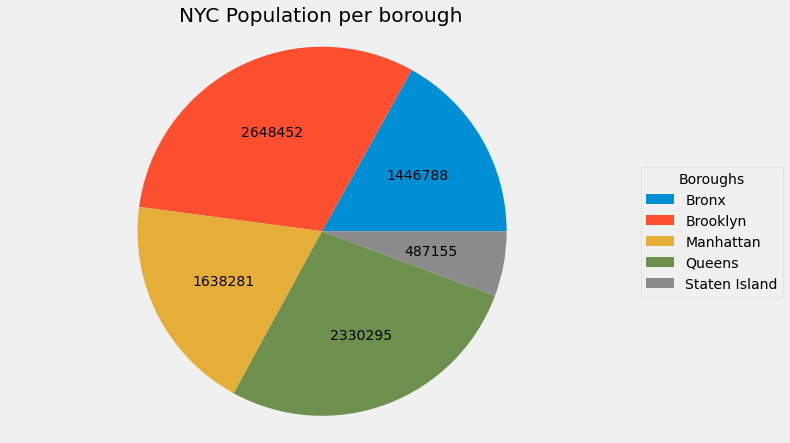

In [178]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(figsize=(10,7))
axes.set(title="NYC Population per borough")
labels = total['borough'].values
wedges, texts, autotexts = axes.pie(pie_shares, shadow=False, startangle=0, autopct=autopct_format(pie_shares))
axes.legend(wedges, labels, title = 'Boroughs', loc = 'center left', bbox_to_anchor = (1,0,0.5,1))
axes.axis('equal')


plt.show()

In [53]:
second_pie = total.groupby('borough')['Density'].sum()

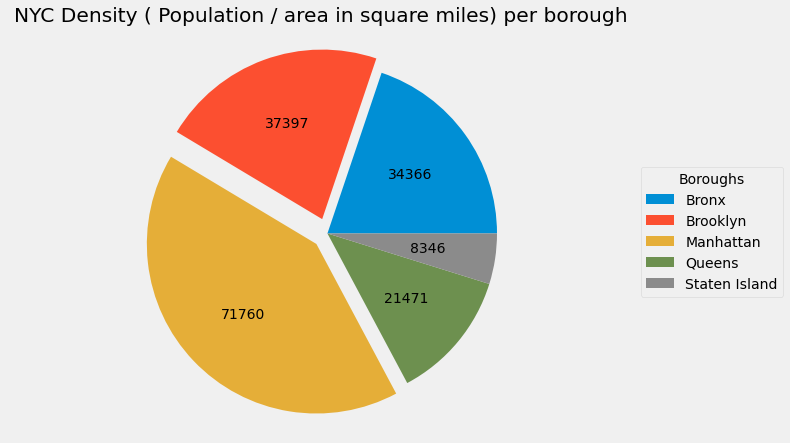

In [176]:
#This chat is showing that Brooklyn and Queens are the denser boroughs thus we will expect a higher fatality rate in this two boroughs
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(figsize=(10,7))
axes.set(title="NYC Density ( Population / area in square miles) per borough")
labels = total['borough'].values
wedges, texts, autotexts = axes.pie(second_pie, explode=(0.00,0.09,0.09,0.00,0.00), shadow=False, startangle=0, autopct=autopct_format(second_pie))
axes.legend(wedges, labels, title = 'Boroughs', loc = 'center left', bbox_to_anchor = (1,0,0.5,1))
axes.axis('equal')


plt.show()

In [128]:
age_filter = '75+'

In [129]:
lst = by_boro[by_boro['subgroup']==age_filter][['BK_FATALITY_RATE', 'BX_FATALITY_RATE','MN_FATALITY_RATE','QN_FATALITY_RATE','SI_FATALITY_RATE']].to_dict('records')

In [156]:
fatality = lst[0].values()

In [157]:
total['Fatality'] = fatality

In [158]:
total

,borough,_2020,land,Density,Fatality
0,Bronx,1446788.0,42.10,34365.510689,0.254528
1,Brooklyn,2648452.0,70.82,37396.950014,0.254630
2,Manhattan,1638281.0,22.83,71760.008760,0.244114
3,Queens,2330295.0,108.53,21471.436469,0.273126
4,Staten Island,487155.0,58.37,8345.982525,0.246771


In [163]:
type(total['borough'].values)

numpy.ndarray

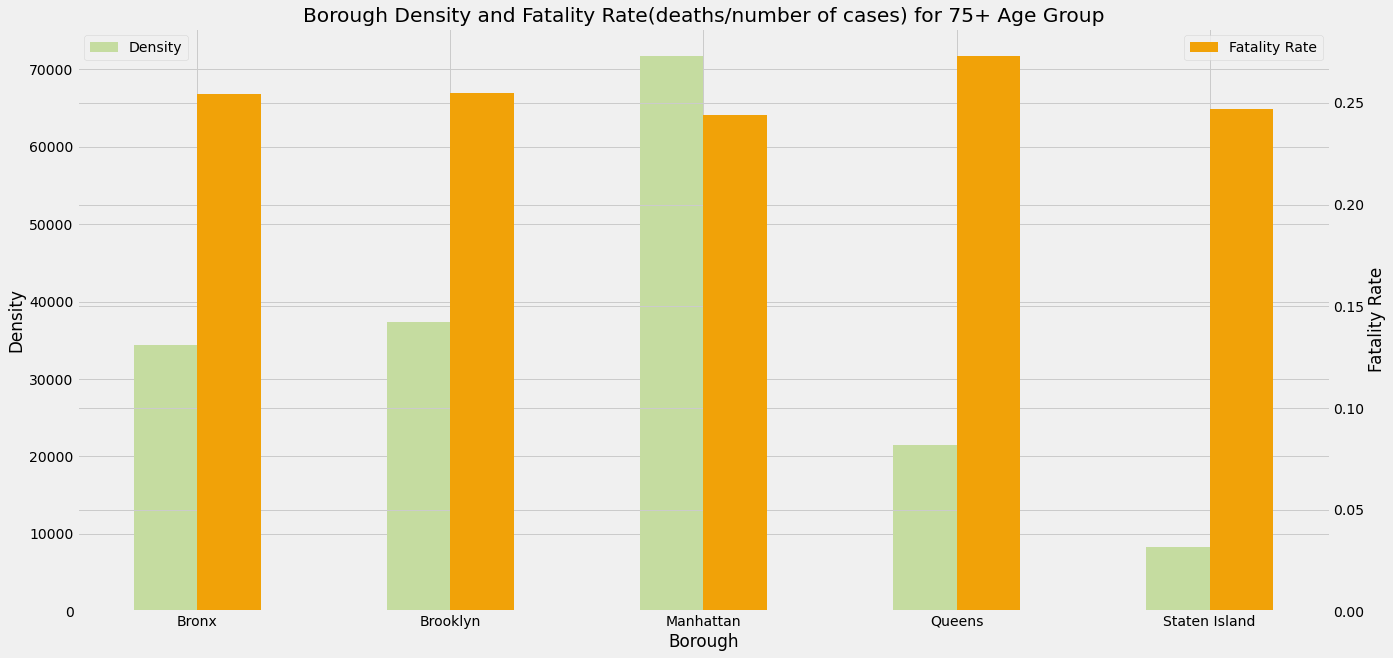

In [203]:
%matplotlib inline

width = 0.25
labels = total['borough'].values
data1 = total.groupby('borough')['Density'].sum()
data2 = total.groupby('borough')['Fatality'].sum()
x = np.arange(len(labels))

plt.style.use('fivethirtyeight')
fig, ax1= plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

ax1.bar(x-width/2, data1, width=width,label='Density', color='#C5DCA0')
ax2.bar(x+width/2, data2,width=width,label='Fatality Rate',color= '#F1A208')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Borough')
ax1.set_ylabel('Density')
ax2.set_ylabel('Fatality Rate')
ax1.set_title(f'Borough Density and Fatality Rate(deaths/number of cases) for {age_filter} Age Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

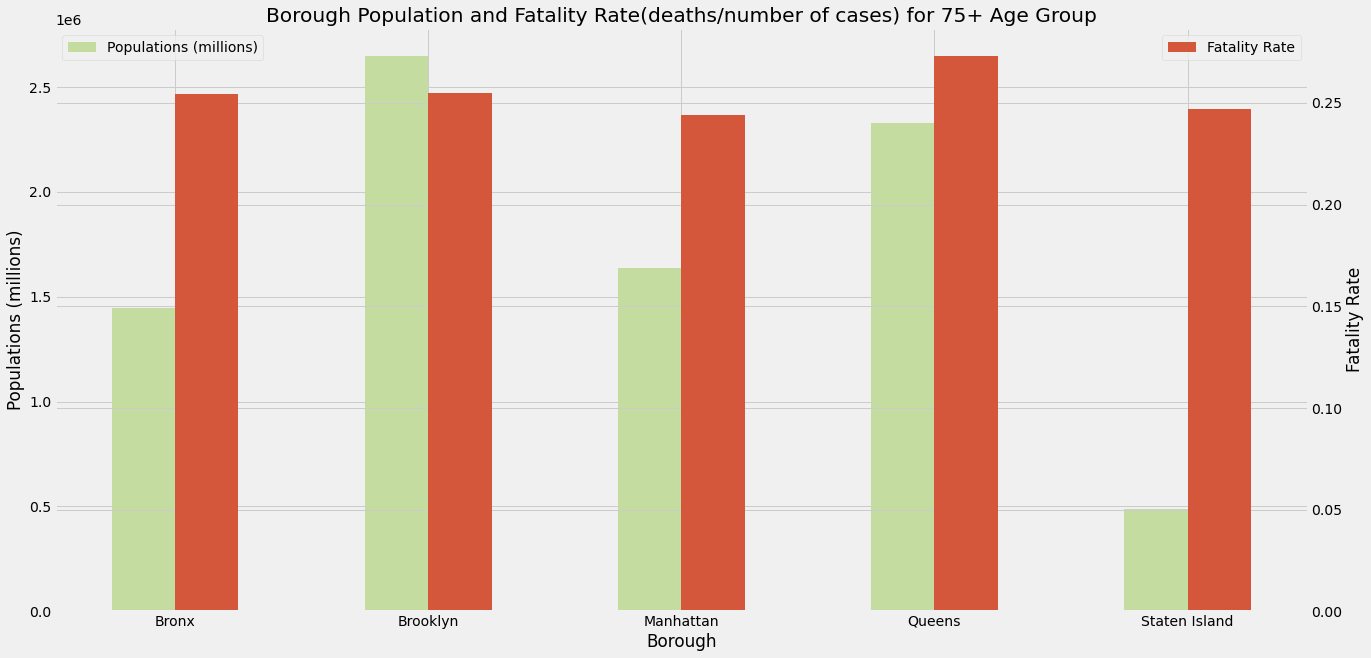

In [205]:
%matplotlib inline

width = 0.25
labels = total['borough'].values
data1 = total.groupby('borough')['_2020'].sum()
data2 = total.groupby('borough')['Fatality'].sum()
x = np.arange(len(labels))

plt.style.use('fivethirtyeight')
fig, ax1= plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

ax1.bar(x-width/2, data1, width=width,label='Populations (millions)', color='#C5DCA0')
ax2.bar(x+width/2, data2,width=width,label='Fatality Rate',color= '#D5573B')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Borough')
ax1.set_ylabel('Populations (millions)')
ax2.set_ylabel('Fatality Rate')
ax1.set_title(f'Borough Population and Fatality Rate(deaths/number of cases) for {age_filter} Age Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [ ]:
by_boro.info()

In [ ]:
by_boro['subgroup'].values

In [ ]:
#Scatter Plot

In [ ]:
# x = by_boro['subgroup'].values
# y = df['fatality_rate'].values
# plt.style.use('fivethirtyeight')
# fig, ax = plt.subplots(figsize=(15,5))
# ax.scatter(x,y, s=50, c="b", alpha=0.3, edgecolors="black", linewidth=1)
# ax.set_xlabel('Population Density')
# ax.set_ylabel('Fatality Rate')
# ax.set_title('Correlation Between Population Density and Fatality Rate')
# plt.show()

In [ ]:
# plt.figure(1 , figsize = (15 , 6))
# for gender in ['Male' , 'Female']:
#     plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
#                 s = 200 , alpha = 0.5 , label = gender)
# plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
# plt.title('Age vs Annual Income w.r.t Gender')
# plt.legend()
# plt.show()

In [ ]:
# ax = by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['BK_FATALITY_RATE'], color='r', label = "Brooklyn")    
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['BX_FATALITY_RATE'], color='g', label="Bronx" ax=ax)    
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['MN_FATALITY_RATE'], color='b', label="Manhattan" ax=ax)
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['QN_FATALITY_RATE'], color='m', label="Queens" ax=ax)
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['SI_FATALITY_RATE'], color='o', label="Manhattan" ax=ax)


In [ ]:
by_boro

In [ ]:
boro_filter = 'BK_FATALITY_RATE'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
age = 'subgroup'
borough_filter = 'BK_CASE_COUNT'
plt.style.use('fivethirtyeight')
N = 8
colors = np.random.rand(N)

plt.scatter(by_boro[age], by_boro[borough_filter], c=colors, alpha=0.5)

plt.show()

# width = 0.25
# labels = ["0-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
# data1 = group_data.groupby('subgroup')[borough_filter].sum()
# data2 = group_data.groupby('subgroup')[borough_fatality_filter].sum()
# x = np.arange(len(labels))

# plt.style.use('fivethirtyeight')
# fig, ax1= plt.subplots(figsize=(20,10))
# ax2 = ax1.twinx()

In [ ]:
columns = list(by_boro.columns)
columns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
age = 'subgroup'
borough_filter = 'BK_CASE_COUNT'
plt.style.use('fivethirtyeight')
N = 8
colors = np.random.rand(N)
for col in columns[1:]:
    plt.scatter(by_boro[age], by_boro[col], c=colors, alpha=0.5, label=col)

plt.show()